<a href="https://colab.research.google.com/github/Divyaramphul/test/blob/main/visualise_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Tweet Analysis

## Workflow
1. Install Packages
2. Get data
3. Visually perform sentiment analysis
  * plot number of positive, negative, neutral tweets each day
  * plot the proportion of postive, negative, neutral tweets
  * create a word cloud from the tweets

## 1. Install packges

In [2]:
from google.colab import output
!pip install snscrape
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/tweets.py
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/stopwords.py
!pip install TextBlob
!pip install WordCloud
output.clear()
print("Required packages installed")

Required packages installed


## 2. Get the Data

In [3]:
from tweets import tweets_to_df
help(tweets_to_df)

Help on function tweets_to_df in module tweets:

tweets_to_df(what, since='2022-01-01', until='2022-01-31', max_tweets=500)
    Performs a simple term based search of twitter tweets to get
    the date and message of the tweet.
    
    Parameters
    ----------
    what: str
      The search term
    since: str, YYYY-MM-DD, optional
      The date to start search from (default 2022-01-01)
    until: str, YYYY-MM-DD, optional
      The date to search to (default 2022-01-31)
    max_tweets: int, optional
      The maximum number of tweets to return (default 500)
    
    Returns
    -------
    Pandas Dataframe of date and the tweet message.  The message has
    been *cleaned* to remove emojis and non english letters.



In [6]:
# Run get_tweets() method.  Your choice of keyword
search_term = input('Please input a search term: ')
tweets_df = tweets_to_df(search_term)

Please input a search term: Python


In [7]:
tweets_df.head(10)

,Date,Clean Text
0,2022-01-30,Python P nico no lago Do fundo do mar
1,2022-01-30,Golden python
2,2022-01-30,Streamlit Google Drive Steamlit Python Streamlit
3,2022-01-30,Pay us to tackle your assignments due in essay...
4,2022-01-30,Dios m o lo mucho que me est gustando Python
5,2022-01-30,Gradio Python Library for building UX for Mach...
6,2022-01-30,Python I Progate 12th SUNABACO python javascript
7,2022-01-30,I think Python is the best language to start with
8,2022-01-30,I feel like trying out ruby Python was awesome...
9,2022-01-30,New package python pytest click Version 1 0 2 ...


## 3. Perform Sentiment Analysis
The sentiment function of textblob returns two properties, polarity, and subjectivity.

See: https://textblob.readthedocs.io/en/dev/index.html


### Polarity
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

### Subjectivity
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [8]:
from textblob import TextBlob

# Wrapper so can use Pandas apply() function on a column
def getSubjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Calculate sentiment, 
tweets_df['Subjectivity'] = tweets_df['Clean Text'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['Clean Text'].apply(getPolarity)

tweets_df.head()

,Date,Clean Text,Subjectivity,Polarity
0,2022-01-30,Python P nico no lago Do fundo do mar,0.000,0.000
1,2022-01-30,Golden python,0.500,0.300
2,2022-01-30,Streamlit Google Drive Steamlit Python Streamlit,0.000,0.000
3,2022-01-30,Pay us to tackle your assignments due in essay...,0.375,-0.125
4,2022-01-30,Dios m o lo mucho que me est gustando Python,0.000,0.000


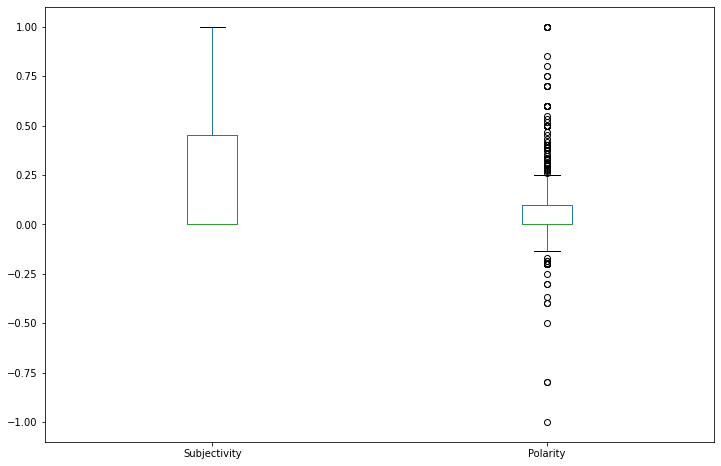

In [14]:
# Do a box plot of columns Subjectivity and Polarity
tweets_df.boxplot(column=['Subjectivity','Polarity'], grid=False, figsize=(12,8))

# Sentiment over time.

From the documentaiton, the values of polsrity can be interpreted a sentiment.  So we can *calculate* the sentiment of each tweet as either positive, negative or neutral.

> There are more precise ways, keeping it simple for thie exercise.

It could be interesting to plot these over time.  SO each day there is a number of tweets, what proportions are positive, negative or neutral.

First let us add a sentiment column


In [9]:
def sentiment(polarity):
  if polarity > 0:
      return 'positive'
  elif polarity == 0:
      return 'neutral'
  else:
      return 'negative'

In [15]:
# Add sentiment column
tweets_df['Sentiment'] = tweets_df['Polarity'].apply(sentiment)
tweets_df.head(20)

,Date,Clean Text,Subjectivity,Polarity,Sentiment
0,2022-01-30,Python P nico no lago Do fundo do mar,0.000000,0.000000,neutral
1,2022-01-30,Golden python,0.500000,0.300000,positive
2,2022-01-30,Streamlit Google Drive Steamlit Python Streamlit,0.000000,0.000000,neutral
3,2022-01-30,Pay us to tackle your assignments due in essay...,0.375000,-0.125000,negative
4,2022-01-30,Dios m o lo mucho que me est gustando Python,0.000000,0.000000,neutral
5,2022-01-30,Gradio Python Library for building UX for Mach...,0.000000,0.000000,neutral
6,2022-01-30,Python I Progate 12th SUNABACO python javascript,0.000000,0.000000,neutral
7,2022-01-30,I think Python is the best language to start with,0.300000,1.000000,positive
8,2022-01-30,I feel like trying out ruby Python was awesome...,0.770833,0.354167,positive
9,2022-01-30,New package python pytest click Version 1 0 2 ...,0.454545,0.136364,positive


In [29]:
# Lets get just the positive tweets
pos = tweets_df[tweets_df["Sentiment"]=="positive"]

Write a function to calculate how many each day.  We will write a function because want to do this for negative and netural tweets.

In [30]:
def num_tweets(df):
    return df['Date'].value_counts().sort_index()

pos_per_day = num_tweets(pos)

In [ ]:
# Plot the positive tweets per day
pos_per_day.plot()

In [32]:
# Now repeat for negative
neg = tweets_df[tweets_df["Sentiment"]=="negative"]

In [25]:
# repeat for neutral
neu = tweets_df[tweets_df["Sentiment"]=="neutral"]

How about propotions of sentiment type?

Visit Python Graph Gallery, 'Part of the Whole', select 'Pie' and loot at the example

([<matplotlib.patches.Wedge at 0x7f6d423f3810>,
 [Text(0.6465637441936395, 0.8899187180267095, ''),
  Text(-0.6353300433780266, 0.8979731265362427, ''),
  Text(-0.3530379778108914, -1.041808133114345, '')])

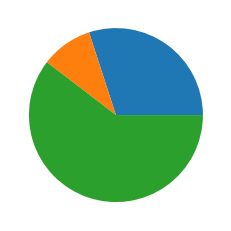

In [33]:
import matplotlib.pyplot as plt
values = [len(pos),len(neg),len(neu)]
plt.pie(values)

We can do better. 

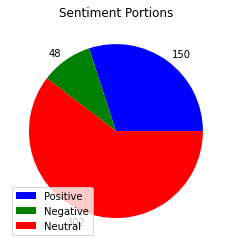

In [34]:
import matplotlib.pyplot as plt
 
values = [len(pos),len(neg),len(neu)]
labels = ['Positive', 'Negative', 'Neutral']
colors = ['b', 'g', 'r']
plt.pie(values, colors=colors, labels= values)
plt.title('Sentiment Portions')
plt.legend(labels,loc=3)
plt.show()

## WordCloud

Visit Python Graph Gallery, 'Ranking', select 'Word Cloud' and loot at the example

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from stopwords import ENGLISH_STOP_WORDS

# Get all the messages
messages = ' '.join(tweets_df['Clean Text'])

stop_words = ENGLISH_STOP_WORDS.add(search_term)    
# Create the wordcloud object
wordcloud = WordCloud(width=680, height=480, margin=0, 
                      stopwords=ENGLISH_STOP_WORDS).generate(messages)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()